# Exploratory Data Analysis - Sports
## The Sparks Foundation

In this notebook, I have performed ‘Exploratory Data Analysis’ on dataset of ‘Indian Premier League’ till 2019.

Dataset available at https://bit.ly/34SRn3b

### Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [107]:
from google.colab import drive

drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


### EDA of Teams

#### Understanding Data

In [108]:
data=pd.read_csv('gdrive/My Drive/matches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob




*   id - match id
*   season - ipl season

*   city - location of match

*   date - date of match

*   team1 & team2 - names of teams playing the match

*   toss_winner - team winning the toss
*   toss_decision - decision to bat/bowl


*   result - match result: normal/tie/no result


*   dl_applied - application of dl method (binary value 0 or 1)


*   win_by_runs - runs a team won the match by

*   win_by_wickets - wickets a team won the match by
*   player_of_match - man of the match

*   venue - stadium
*   umpire1,2,3 - names of umpires

#### Individual Teams Data

In [109]:
data=pd.read_csv('gdrive/My Drive/matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Analysis of Toss

In [110]:
team_stats = pd.DataFrame({'Matches Played': data.team1.value_counts() + data.team2.value_counts(), 'Matches Won': data.winner.value_counts(), 'Toss won': data.toss_winner.value_counts(), 
                          'Matches lost': ((data.team1.value_counts() + data.team2.value_counts()) - data.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Matches Won'] / team_stats['Matches Played']
winloss = pd.DataFrame({'Win:Loss': team_stats['Matches Won'] / team_stats['Matches Played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Matches Played,Matches Won,Toss won,Matches lost,Win:Loss
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,109,98,78,0.58
9,Pune Warriors,46,12,20,34,0.26


Text(0.5, 1.0, 'Number of Toss Wins')

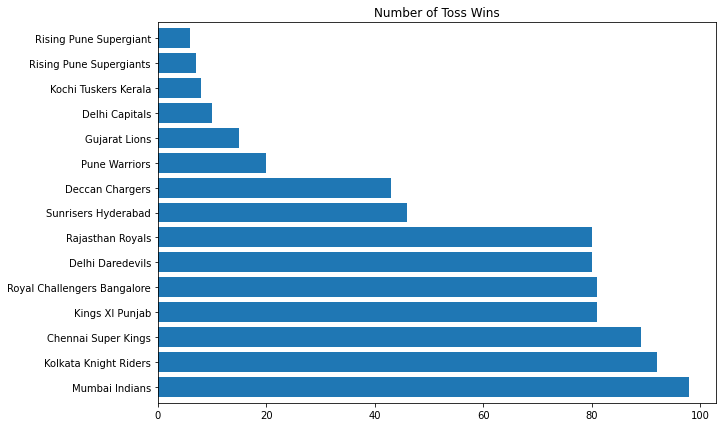

In [111]:
plt.subplots(figsize=(10,7))
ax=data['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title("Number of Toss Wins")

**As toss plays an important role in the outcome of a cricket match, it is important to study its statistical inference. 
Mumbai Indians has won maximum number of tosses in the tournament.**

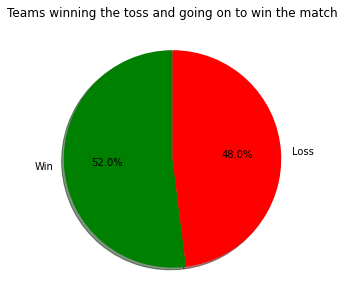

In [112]:
Tosswin_matchwin=data[data['toss_winner']==data['winner']]
slices=[len(Tosswin_matchwin),(len(data)-len(Tosswin_matchwin))]
labels=['Win','Loss']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams winning the toss and going on to win the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

**The toss has an impact in the result of a cricket match. According to the data, the chances of a team winning the match after winning the toss are reasonably high.
Hence, winning a toss contributes towards the victory of a team.**

#### Analysis of Match Results

Text(0, 0.5, 'Matches')

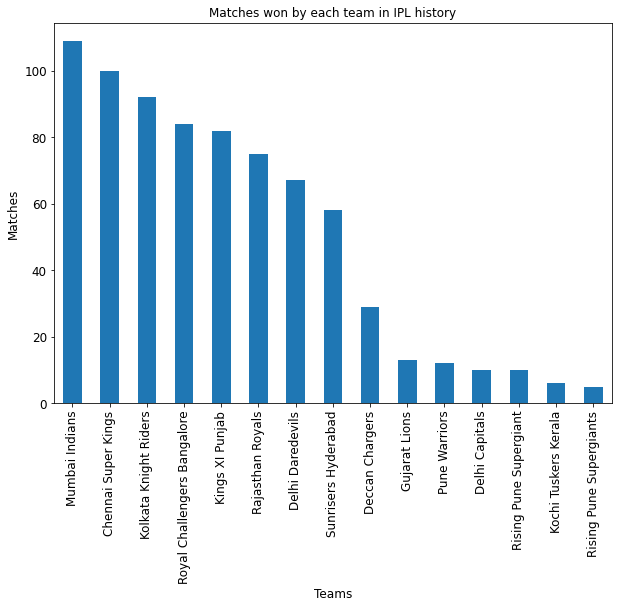

In [113]:
Total_won = data.winner.value_counts()
ax = Total_won.plot(kind='bar', title ="Matches won by each team in IPL history",figsize=(10,7), fontsize=12)
ax.set_xlabel("Teams",fontsize=12)
ax.set_ylabel("Matches",fontsize=12)

**Number of matches won by a team is an indicator of the team's performance in the tournamnet.
Mumbai Indians have won the highest number of matches in the tournament.**

#### Analysis of IPL Titles

In [114]:
season_winner = data.drop_duplicates(subset=['season'],keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


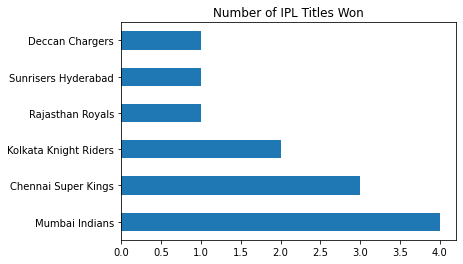

In [115]:
season_winner.winner.value_counts().plot(kind='barh',orientation='horizontal',title='Number of IPL Titles Won')

**Number of IPL titles won by a team reflects its performance and consistency through the IPL seasons. Mumbai Indians have won the maximum number of IPL titles i.e. 4.**

#### Analysis of Individual Team Performance Vs Other Teams

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


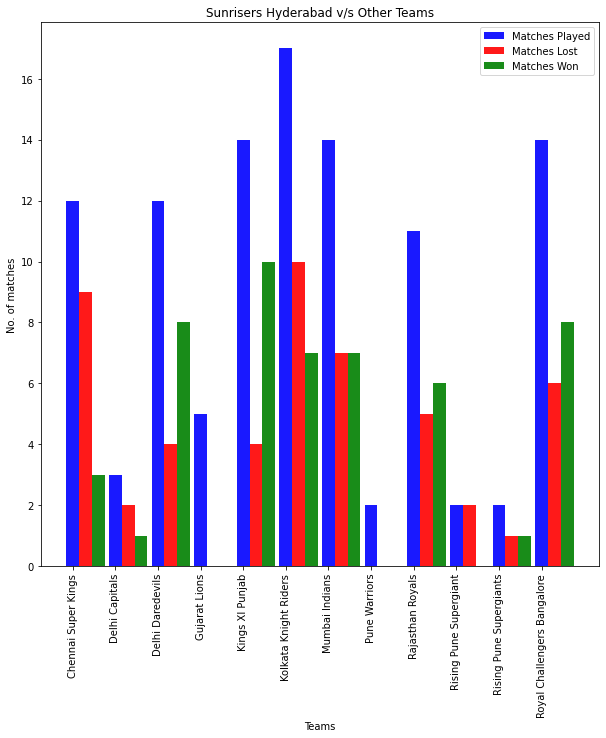

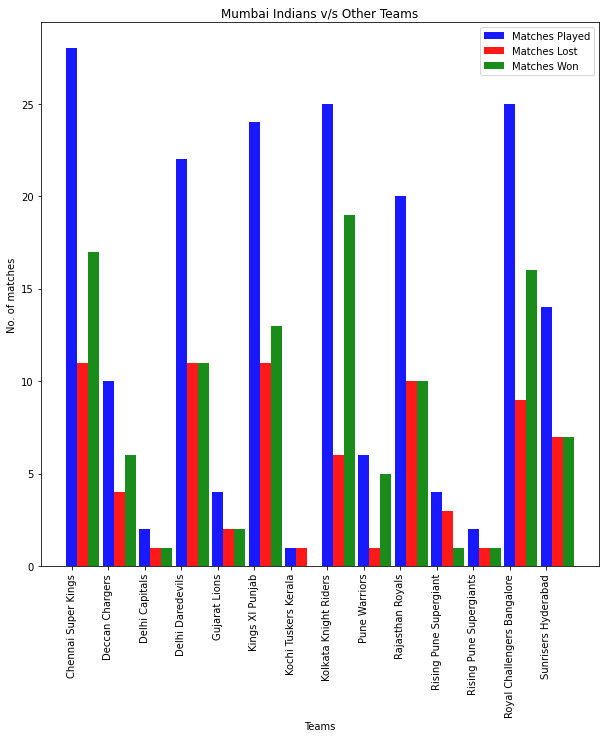

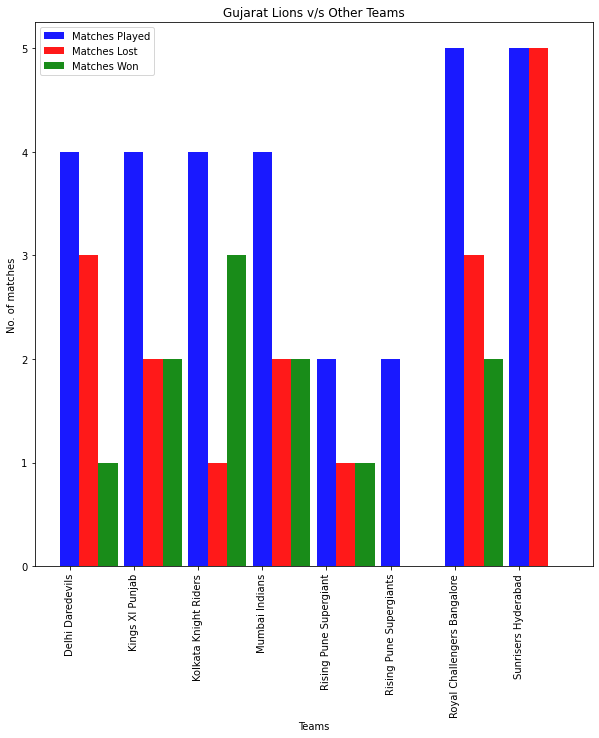

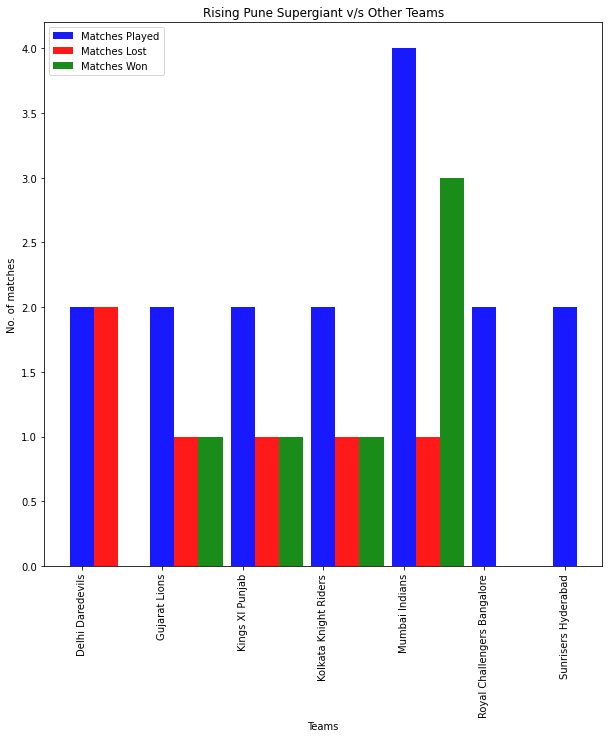

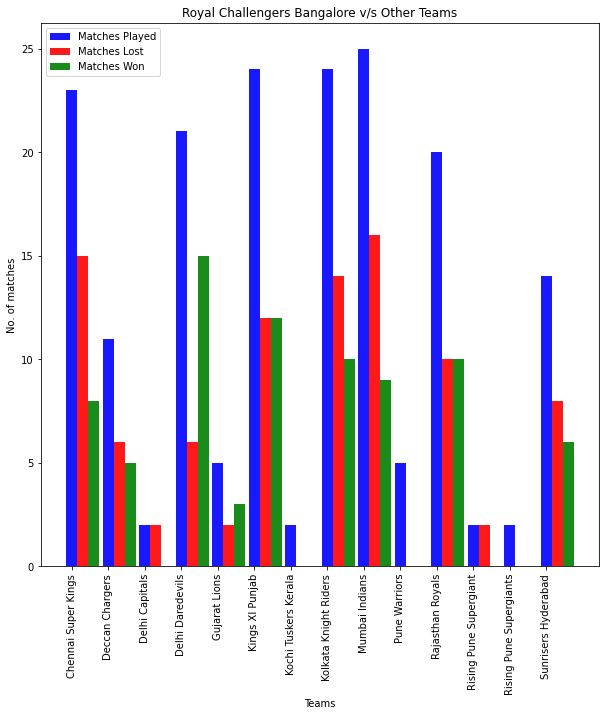

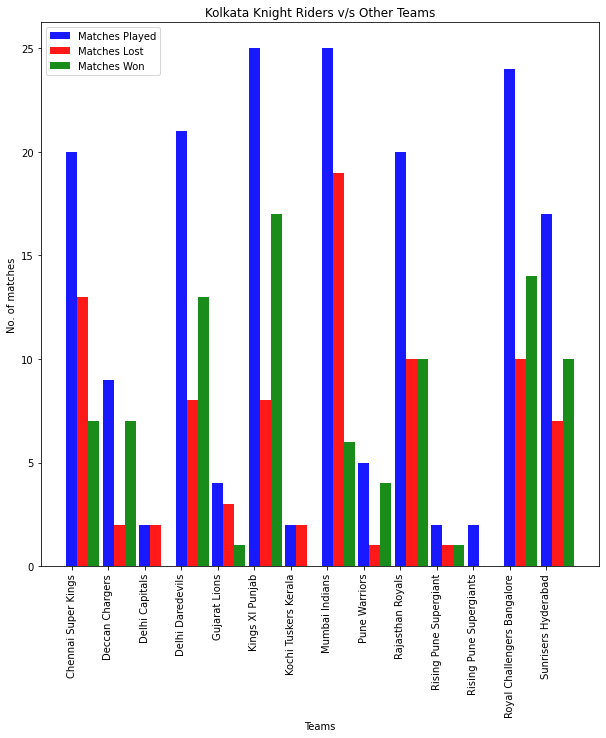

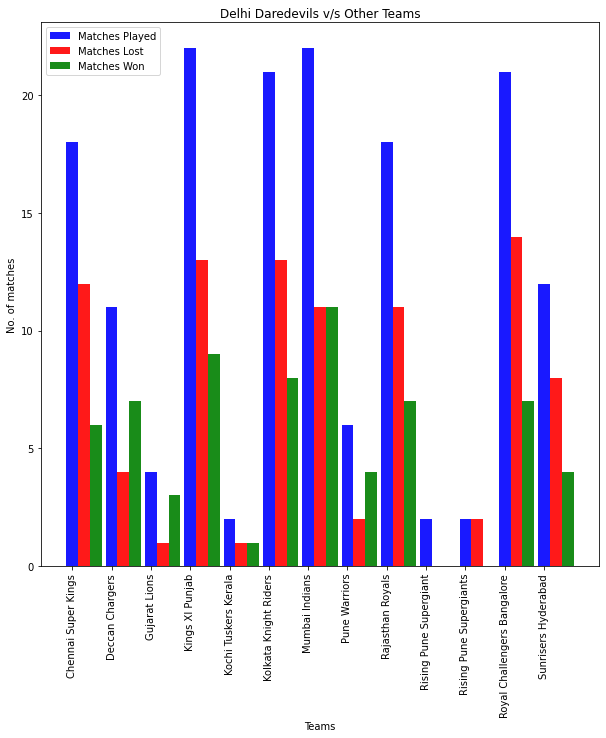

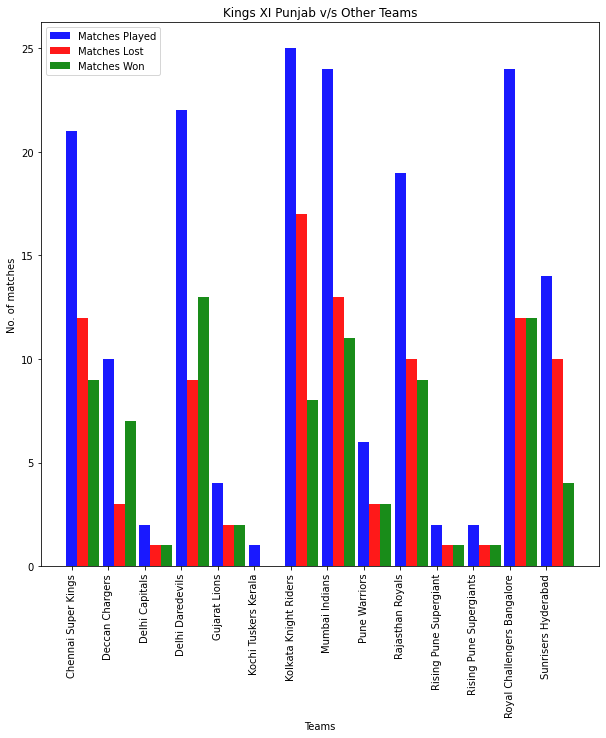

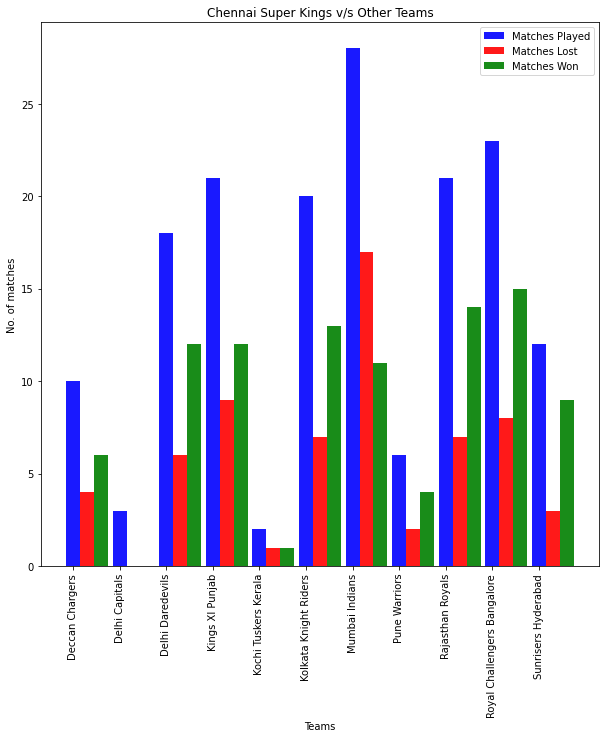

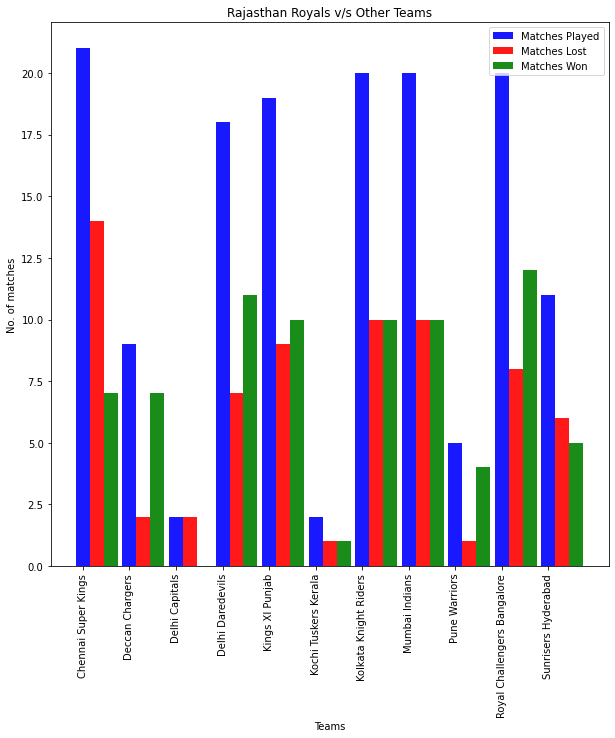

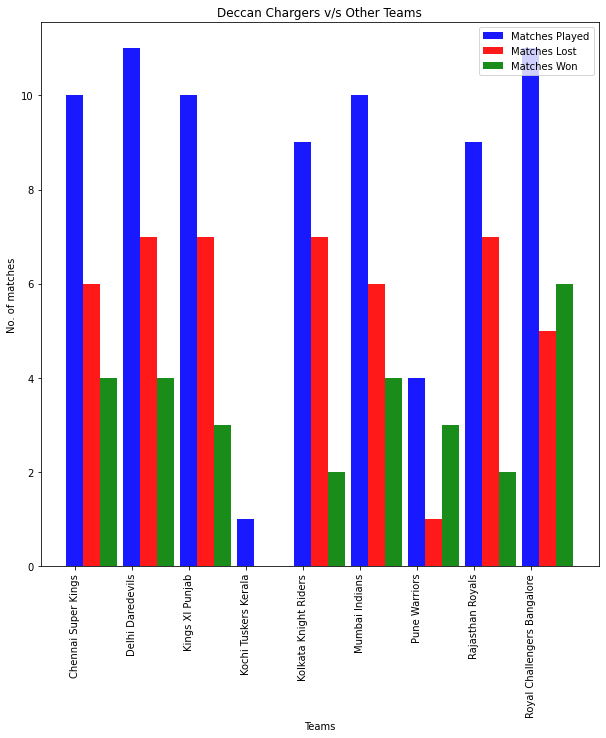

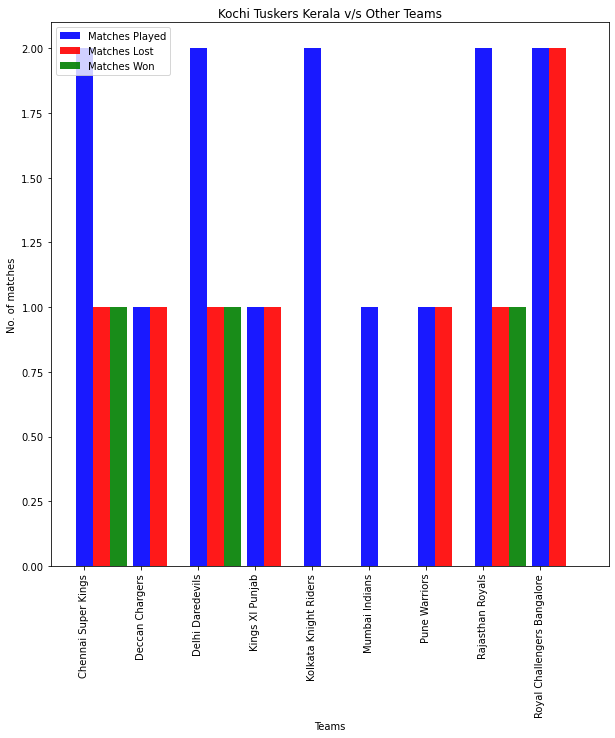

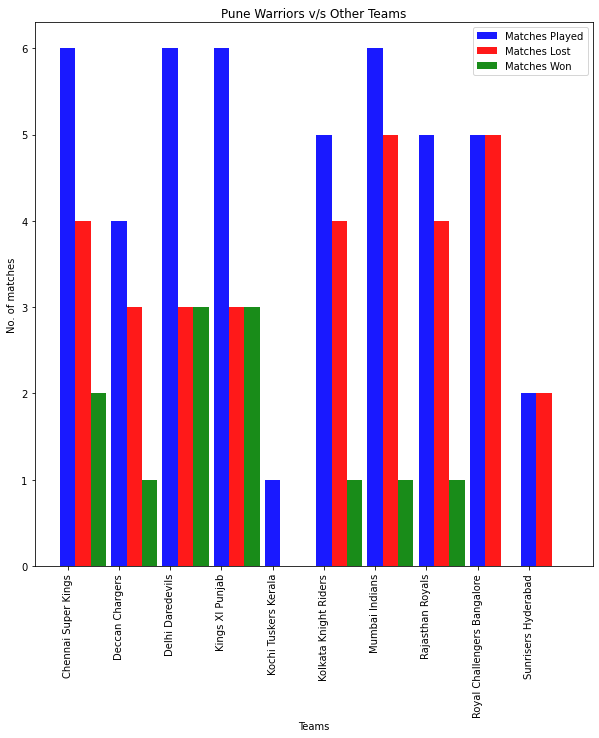

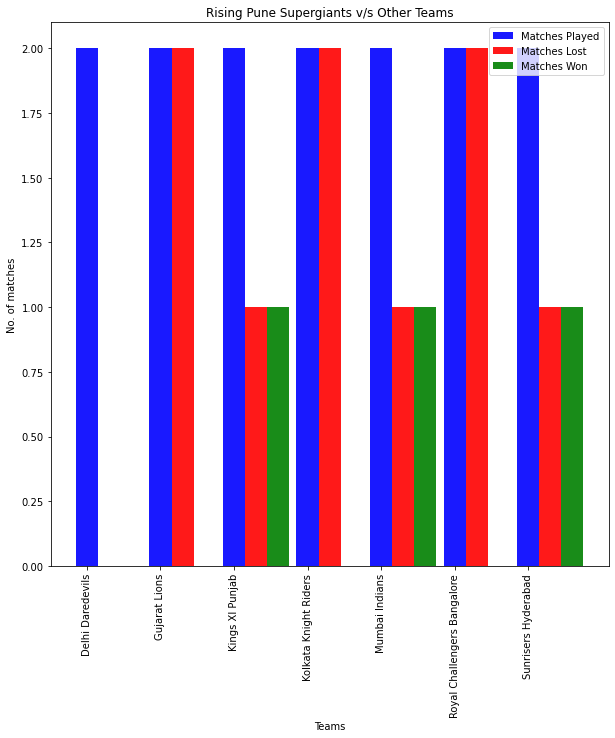

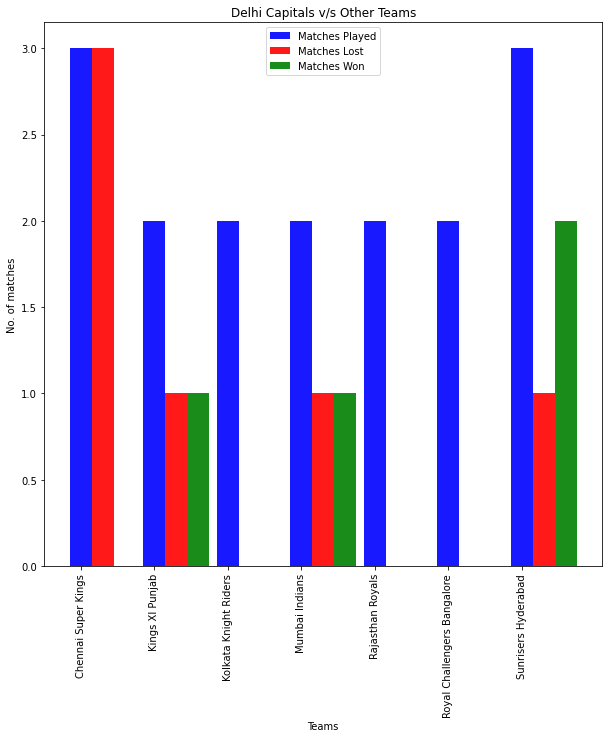

In [116]:
df_matches=pd.read_csv('gdrive/My Drive/matches.csv')
for i in df_matches["team1"].unique():
    new_df=df_matches.copy()
    for j in range(len(df_matches)):
        if (new_df["team1"][j] != i and new_df["team2"][j] == i):
            a=new_df["team1"][j]
            new_df["team1"][j]=new_df["team2"][j]
            new_df["team2"][j]=a
        elif(new_df["team1"][j] != i and new_df["team2"][j] != i):
            new_df=new_df.drop([j],axis=0)
    new_df["won"]=(new_df["winner"]==i).astype(int)
    won=pd.DataFrame({'Total':new_df.team2.value_counts(),'won': new_df.winner.value_counts()})
    won=won.drop(index=i)
    fig,ax=plt.subplots(figsize=(10,10))
    bar_width = 0.3
    opacity = 0.9
    index=np.arange(len(won))
    ax.bar(index,won['Total'],bar_width, alpha=opacity,color='b',label='Matches Played')
    ax.bar(index+bar_width,won['won'],bar_width, alpha=opacity,color='r',label='Matches Lost')
    ax.bar(index+2*bar_width,won['Total']-won['won'],bar_width, alpha=opacity,color='g',label='Matches Won')
    ax.legend()
    ax.set_xlabel('Teams')
    ax.set_ylabel('No. of matches')
    ax.set_title(i+' v/s Other Teams')
    plt.xticks(ticks=index,labels=won.index,rotation=90)
    plt.show()

**From the above graphs, the performance of Mumbai Indians and Chennai Super Kings against other teams reflects their dominance in the tournament.**

### EDA of Players

#### Understanding Data

In [117]:
df=pd.read_csv('gdrive/My Drive/deliveries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int



*   match_id - match id
*   inning - 1st or 2nd inning
*   batting_team - name of batting team
*   bowling_team - name of bowling team
*   over - over number in the innings
*   ball - ball number in the over
*   batsman - name of batsman on strike
*   non_striker - name of batsman at non-striker end
*   bowler - name of bowler
*   is_super_over - is it a super over? (binary value 0 or 1)
*   wide_runs - how many runs conceded by wide
*   bye_runs - number of bye runs conceded
*   legbye_runs - number of leg bye runs conceded
*   noball_runs - number of no ball runs conceded
*   penalty_runs - number of penalty runs conceded
*   batsman_runs - number of runs scored by batsman
*   total_runs - total runs off the ball
*   player_dismissed - name of the batsman dismissed
*   dismissal_kind - how the bastman is dismissed(LBW, hit-wicket, run-out, etc)
*   fielder - name of the player fielding the ball

#### Analysis of Batsmen

In [118]:
batsmen_summary = df.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'Balls', 'batsman_runs': 'Runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['Balls','Runs'], ascending=False)
batsmen_summary['Strike Rate'] = batsmen_summary['Runs']/batsmen_summary['Balls'] * 100
batsmen_summary['Strike Rate'] = batsmen_summary['Strike Rate'].round(2)

def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            alist.append(lookuplist[i])
        except KeyError:
            alist.append(0)
    return alist

alist = []
for r in df.batsman_runs.unique():
    lookuplist = df[df.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen_summary[str(r) + 's'] = trybuild(lookuplist, batsmen_summary)
    try:
        alist.append(lookuplist[r])
    except KeyError:
        alist.append(0)

played = {}
def BuildPlayedDict(x):
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

TopBatsman = batsmen_summary.sort_values(['Balls','Runs'], ascending=False)[:20]

df.groupby('match_id').apply(BuildPlayedDict)

TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['Runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman

,Balls,Runs,Strike Rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0,170,26.152941,0.917647,2.564706
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0,126,37.626984,1.436508,3.642857
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2,170,26.335294,1.217647,1.747059
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0,132,29.166667,0.560606,3.068182


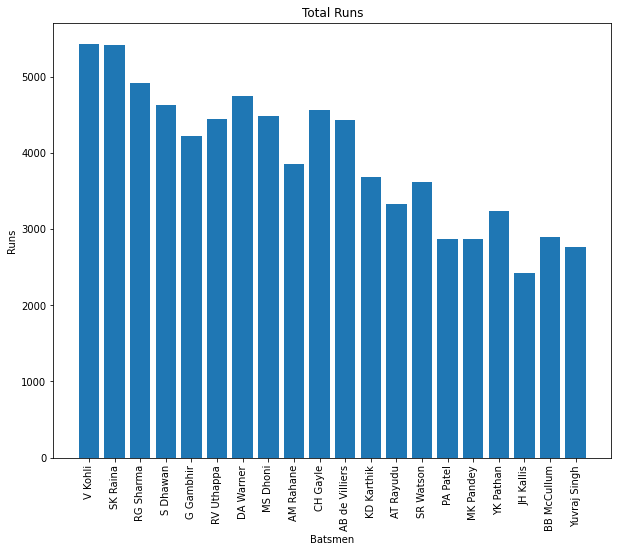

In [119]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['Runs'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()

**From the above graph, it is evident that Virat Kohli is the highest run scorer in the tournament.**

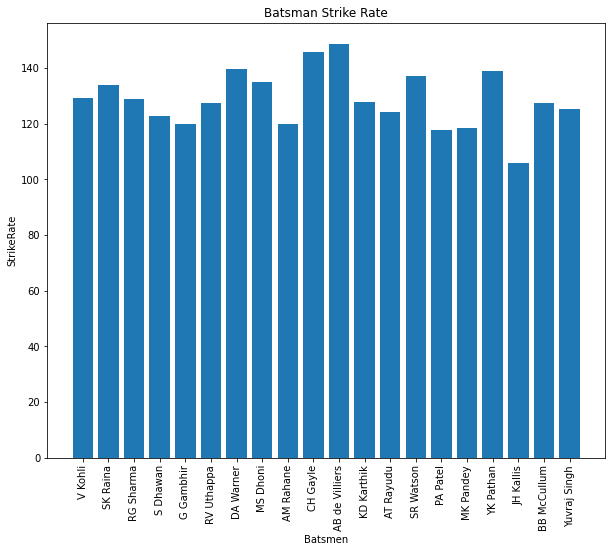

In [120]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['Strike Rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('StrikeRate')
plt.title('Batsman Strike Rate')
plt.show()

**The most important factor for a batsman in a T20 tournament is to have a healthy strike rate. From the above graph it can be inferred that AB de Villiers has the highest strike rate in the tournament.**

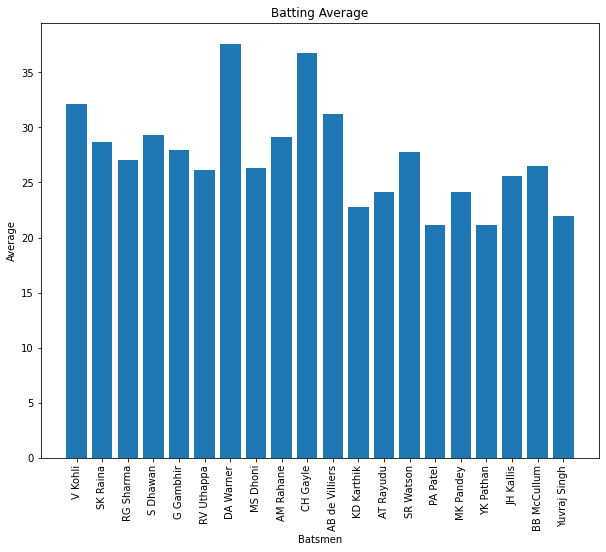

In [121]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['average'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Average')
plt.title('Batting Average')
plt.show()

**The consistency of a batsman is reflected in his average. From the above graph, we can infer that DA Warner has the highest average in IPL.**

#### Analysis of Bowlers

In [122]:
bowler_wickets = df.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['Runs','Balls','Wickets']
TopBowlers = bowler_wickets.sort_values(['Wickets'], ascending=False)[:20]
TopBowlers['Economy'] = TopBowlers['Runs']/(TopBowlers['Balls']/6)
TopBowlers = TopBowlers.sort_values(['Economy'], ascending=True)[:20]
TopBowlers

,Runs,Balls,Wickets,Economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
MM Sharma,1770,2457,99,4.322344
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
YS Chahal,1841,2416,102,4.572020
RP Singh,1874,2417,100,4.652048
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506


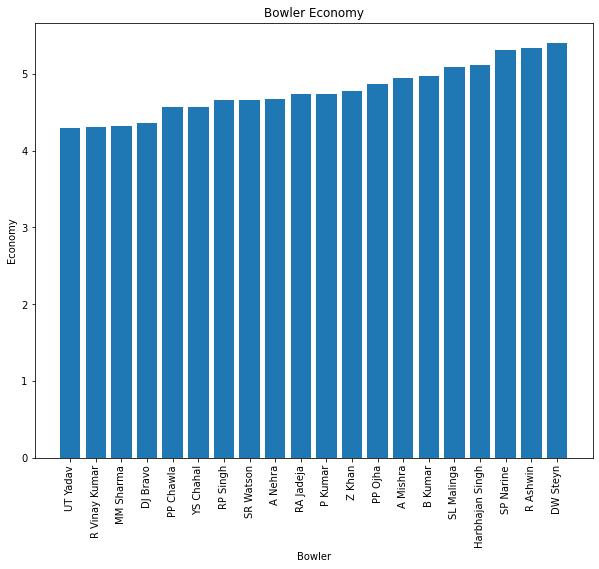

In [123]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['Economy'])
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Economy')
plt.title('Bowler Economy')
plt.show()

**In a T20 tournament, the economy of a bowler indicates the performance of that player. Hence, higher economy is not good news for any bowler. As inferred from the above graph, UT Yadav has the lowest economy in the tournament.**

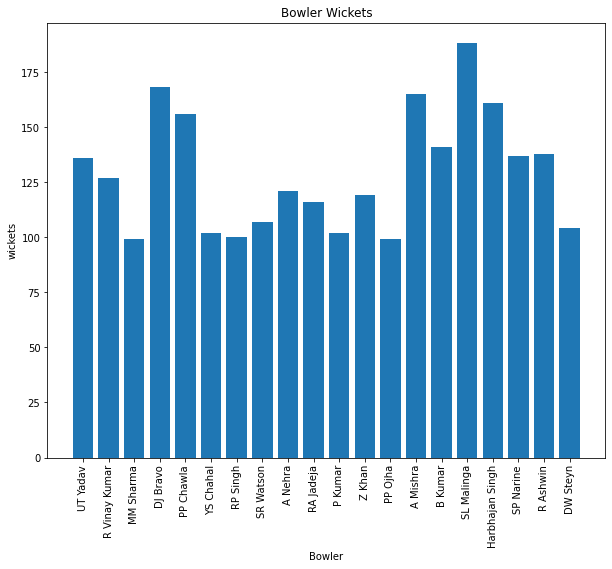

In [124]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['Wickets'])
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowler Wickets')
plt.show()

**The number of wickets taken by a bowler indicate their success in the tournament. As reflected in the above graph, SL Malinga is the leading wicket taker in the tournament.**

### Recommendations for Endorsements

**Teams**


1.   Mumbai Indians
2.   Chennai Super Kings
3.   Kolkata Knight Riders

**Batsmen**


1.   Virat Kohli
2.   AB de Villiers
3.   DA Warner

**Bowlers**

1.   UT Yadav
2.   SL Malinga
3.   DJ Bravo



